# Project Final Report

### Due: Midnight on April 27 (2-hour grace period) — 50 points  

### No late submissions will be accepted.


## Overview

Your final submission consists of **three components**:

---

### 1. Final Report Notebook [40 pts]

Complete all sections of this notebook to document your final decisions, results, and broader context.

- **Part A**: Select the single best model from your Milestone 2 experiments. Now that you’ve finalized your model, revisit your decisions from Milestones 1 and 2. Are there any steps you would change—such as cleaning, feature engineering, or model evaluation—given what you now know?

- **Part B**: Write a technical report following standard conventions, for example:
  - [CMU guide to structure](https://www.stat.cmu.edu/~brian/701/notes/paper-structure.pdf)
  - [Data science report example](https://www.projectpro.io/article/data-science-project-report/620)
  - The Checklist given in this week's Blackboard Lesson (essentially the same as in HOML).
    
  Your audience here is technically literate but unfamiliar with your work—like your manager or other data scientists. Be clear, precise, and include both code (for illustration), charts/plots/illustrations, and explanation of what you discovered and your reasoning process. 

The idea here is that Part A would be a repository of the most important code, for further work to come, and Part B is
the technical report which summarizes your project for the data science group at your company. Do NOT assume that readers of Part B are intimately familiar with Part A; provide code for illustration as needed, but not to run.

Submit this notebook as a group via your team leader’s Gradescope account.

---

### 2. PowerPoint Presentation [10 pts]

Create a 10–15 minute presentation designed for a general audience (e.g., sales or marketing team).

- Prepare 8–12 slides, following the general outline of the sections of Part B. 
- Focus on storytelling, visuals (plots and illustrations), and clear, simplified language. No code!
- Use any presentation tool you like, but upload a PDF version.
- List all team members on the first slide.

Submit as a group via your team leader’s Gradescope account.

---

### 3. Individual Assessment

Each team member must complete the Individual Assessment Form (same as in Milestone 1), sign it, and upload it via their own Gradescope account.

---

## Submission Checklist

-  Final Report Notebook — Team leader submission
-  PDF Slides — Team leader submission
-  Individual Assessment Form — Each member submits their own


## Part A: Final Model and Design Reassessment [10 pts]

In this part, you will finalize your best-performing model and revisit earlier decisions to determine if any should be revised in light of your complete modeling workflow. You’ll also consolidate and present the key code used to run your model on the preprocessed dataset, with thoughtful documentation of your reasoning.

**Requirements:**

- Reconsider **at least one decision from Milestone 1** (e.g., preprocessing, feature engineering, or encoding). Explain whether you would keep or revise that decision now that you know which model performs best. Justify your reasoning.
  
- Reconsider **at least one decision from Milestone 2** (e.g., model evaluation, cross-validation strategy, or feature selection). Again, explain whether you would keep or revise your original decision, and why.

- Below, include all code necessary to **run your final model** on the processed dataset. This section should be a clean, readable summary of the most important steps from Milestones 1 and 2, adapted as needed to fit your final model choice and your reconsiderations as just described. 

- Use Markdown cells and inline comments to explain the structure of the code clearly but concisely. The goal is to make your reasoning and process easy to follow for instructors and reviewers.

> Remember: You are not required to change your earlier choices, but you *are* required to reflect on them and justify your final decisions.


## Part A: Final Model and Design Reassessment

### Reassessment of Milestone 1 Decisions

In Milestone 1, we handled missing values using `SimpleImputer`, encoded categorical variables with `OrdinalEncoder`, and scaled numerical features with `StandardScaler`. While most of these decisions were appropriate, we now realize that more careful outlier handling could have improved performance. For example, the target variable `taxvaluedollarcnt` contained extreme values, and applying a log transformation might have helped stabilize variance and reduce skew. However, due to time constraints, we decided to retain the original scale for interpretability and consistency across evaluations.

### Reassessment of Milestone 2 Decisions

During Milestone 2, we evaluated a wide range of models and performed hyperparameter tuning using `GridSearchCV`. The **Gradient Boosting Regressor** emerged as the top performer based on cross-validated RMSE. However, one major challenge was the computational cost — we underestimated how long the grid search would take to complete. Given more time, we would have liked to explore more granular tuning, especially with ensemble models where small adjustments can yield significant performance gains.

Similarly, our approach to feature selection was primarily constrained by runtime. We used `SelectKBest` with f-regression and selected the top 10 features. With more resources, we would have liked to evaluate a wider set of features and combine this with more robust model-aware selection techniques such as RFE. Optimizing the final model using these extended feature sets in combination with a more exhaustive hyperparameter search remains a clear area for future improvement.

---

### Final Model Code

Below is a clean version of the code to run our final model using the best-performing feature subset and hyperparameters.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load cleaned dataset
df = pd.read_csv("zillow_cleaned.csv")

# Recreate engineered features from Milestone 2
df["log_finishedsqft"] = np.log1p(df["calculatedfinishedsquarefeet"])
df["sqft_to_lot_ratio"] = df["calculatedfinishedsquarefeet"] / df["lotsizesquarefeet"]

# We only use the 10 selected features from Milestone 2
selected_features = [
    'parcelid', 'bathroomcnt', 'bedroomcnt', 'poolcnt',
    'rawcensustractandblock', 'regionidcity', 'regionidzip',
    'roomcnt', 'log_finishedsqft', 'sqft_to_lot_ratio'
]

# Define X and y
X = df[selected_features]
y = df["taxvaluedollarcnt"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: impute + scale + model
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
])

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = pipeline.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test:,.2f}")

# Evaluate on training set
y_train_pred = pipeline.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train RMSE: {rmse_train:,.2f}")


Test RMSE: 253,585.85
Train RMSE: 229,305.00


## Part B: Final Data Science Project Report Assignment [30 pts]

This final report is the culmination of your semester-long Data Science project, building upon the exploratory analyses and modeling milestones you've already completed. Your report should clearly communicate your findings, analysis approach, and conclusions to a technical audience. The following structure and guidelines, informed by best practices, will help you prepare a professional and comprehensive document.

### Required Sections

Your report must include the following sections:


#### 1. Executive Summary (Abstract) [2 pts]
- Brief overview of the entire project (150–200 words)
- Clearly state the objective, approach, and key findings

### Executive Summary (Abstract)

This project aimed to develop a predictive model for estimating the assessed tax value of residential properties using a subset of Zillow’s housing data. The dataset featured over 50 property-level variables, ranging from structural details to geographic identifiers. After extensive data cleaning and exploratory analysis, we engineered new variables such as a log-transformed square footage (`log_finishedsqft`) and a space utilization ratio (`sqft_to_lot_ratio`) to improve predictive power.

Several regression models were evaluated, including linear models and ensemble techniques. Gradient Boosting Regressor emerged as the top performer after hyperparameter tuning with cross-validation. The final model was trained on ten carefully selected features and achieved strong performance:

- **Train RMSE**: \$229,305  
- **Test RMSE**: \$253,586

These results indicate a well-generalized model capable of handling Zillow’s valuation tasks with confidence. While model performance was solid, limitations such as skewed target distribution, computational constraints, and limited feature depth were noted. Nonetheless, the project demonstrates a full end-to-end data science workflow — from raw data through modeling and evaluation — and provides a strong baseline for future model refinement and deployment within Zillow’s analytics ecosystem.


#### 2. Introduction [2 pts]
- Clearly introduce the topic and context of your project
- Describe the problem you are addressing (the problem statement)
- Clearly state the objectives and goals of your analysis

Note: You may imaginatively consider this project as taking place in a real estate company with a small data science group in-house, and write your introduction from this point of view (don't worry about verisimilitude to an actual company!).  

### Introduction

As members of Zillow’s internal data science team, we were tasked with improving the platform’s ability to estimate the assessed tax value (`taxvaluedollarcnt`) of residential properties. Accurate property valuations are vital to maintaining Zillow’s reputation as a trusted resource for buyers, sellers, investors, and advertisers alike.

This initiative is part of a broader effort to enhance the accuracy and completeness of Zillow’s real estate listings, especially in cases where official tax data may be missing, delayed, or inconsistent. Using a subset of Zillow’s housing dataset, our team explored ways to predict tax values based on a mix of structural, geographic, and engineered features.

The objective was to design a machine learning pipeline that is both accurate and scalable. We leveraged exploratory data analysis, feature engineering, and model evaluation to identify the most promising modeling approach, which we then fine-tuned using performance metrics such as RMSE. The details of our methodology, model selection, and results are outlined in the following sections.


#### 3. Data Description [2 pts]
- Describe the source of your dataset (described in Milestone 1)
- Clearly state the characteristics of your data (size, types of features, missing values, target, etc.)

### Data Description

The dataset used in this project is a curated subset of the Zillow housing dataset. It contains detailed property-level information including structural features (e.g., number of bathrooms, square footage), geographic identifiers (e.g., region ID, census tract), and target labels for tax-assessed value (`taxvaluedollarcnt`).

The raw dataset included approximately 34,000 rows and over 50 columns. A mix of data types was present — floats, integers, and strings — with significant missingness in many features. Some features were removed due to having over 80% missing values, extremely low variance, or irrelevance to our predictive goal.

After cleaning, the dataset retained a balanced mix of numerical and categorical variables. The target variable, `taxvaluedollarcnt`, was highly skewed with extreme values. Although a log transformation was considered, we ultimately preserved the original scale to maintain interpretability and comparability with real-world valuations.

This cleaned dataset formed the basis for all modeling and analysis.

#### 4. Methodology (What you did, and why)  [12 pts]

**Focus this section entirely on the steps you took and your reasoning behind them. Emphasize the process and decision-making, not the results themselves**

- Describe your analytical framework 
  - Use of validation curves to see the effect of various hyperparameter choices, and
  - Choice of RMSE as primary error metric
- Clearly outline your data cleaning and preprocessing steps
  - Describe what issues you encountered in the raw data and how you addressed them.
  - Mention any key decisions (e.g., removing samples with too many missing values).
  - What worked and what didn't work?
- Describe your feature engineering approach
  - Explain any transformations, combinations, or derived features.
  - Discuss why certain features were chosen or created, even if they were later discarded.
  - What worked and what didn't work?
- Detail your model selection process 
  - Outline the models you experimented with and why.
  - Discuss how you evaluated generalization (e.g., cross-validation, shape and relationships of plots).
  - Mention how you tuned hyperparameters or selected the final model.



### Methodology (What we did, and why)

#### Analytical Framework

We framed this as a regression task, using Root Mean Squared Error (RMSE) as our primary performance metric. RMSE was chosen because it penalizes large errors more heavily — a useful property for real estate pricing where outliers matter. For model evaluation and tuning, we used `GridSearchCV` with cross-validation to ensure generalizability and reduce overfitting risk.

---

#### Data Cleaning & Preprocessing

Our starting dataset included 77,613 rows and 55 columns. Many columns had substantial missingness or very low variance — we dropped 23 columns with more than 80% missing values, as well as 10 columns with only one or no unique values.

For the remaining numerical features, we applied median imputation to handle missing values. Categorical variables were encoded using `OrdinalEncoder`. After filtering and cleaning, we retained a balanced mix of usable numerical and categorical features.

The resulting dataset formed the foundation for our modeling pipeline. We split it into training and testing subsets using an 80/20 split, and scaled numerical inputs using `StandardScaler` to ensure consistency across models.

---

#### Feature Engineering

In Milestone 2, we created new features to capture nonlinear patterns:
- `log_finishedsqft`: log-transformed square footage to reduce skew
- `sqft_to_lot_ratio`: a proxy for land-use efficiency
- `bath_bed_interaction`: number of bathrooms × number of bedrooms

We also evaluated features using statistical tests (F-regression), selecting the top 10 based on performance. These were used for final model training to reduce overfitting and improve interpretability.

---

#### Model Selection & Tuning

We experimented with the following models:
- Linear Regression
- Ridge & Lasso Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Bagging Regressor

Gradient Boosting Regressor consistently outperformed others on validation RMSE. We used `GridSearchCV` to tune its key parameters (`n_estimators`, `max_depth`, `learning_rate`) on the 10 best features. Due to compute limitations, we kept the grid search efficient with focused parameter ranges.

Our final model used:
- `n_estimators=200`
- `learning_rate=0.1`
- `max_depth=5`

#### 5. Results and Evaluation (What you found, and how well it worked) [10 pts]

**Focus purely on outcomes, with metrics, visuals, and insights. This is where you present evidence to support your conclusions.**

- Provide a clear and detailed narrative of your analysis and reasoning using the analytical approach described in (4). 
- Discuss model performance metrics and results (RMSE, R2, etc.)
- **Include relevant visualizations (graphs, charts, tables) with appropriate labels and captions**
- Error analysis
  - Highlight specific patterns of error, outliers, or questionable features.
  - Note anything surprising or worth improving in future iterations.


### Results and Evaluation (What we found, and how well it worked)

After training and tuning several models, the best performance was achieved by a **Gradient Boosting Regressor**, using 10 selected features and hyperparameters optimized via `GridSearchCV`. The model achieved the following on the held-out test set:

- **Train RMSE**: \$229,305
- **Test RMSE**: \$253,586

This level of error is reasonable in the context of property valuations, especially considering the skewed distribution of the target variable and the broad range of home prices.

---

#### Visualization: Actual vs Predicted

A scatter plot of predicted values vs. actual values highlights the model’s general effectiveness — while lower-valued homes tend to be predicted more accurately, some error persists at the high end (as expected with skewed targets).

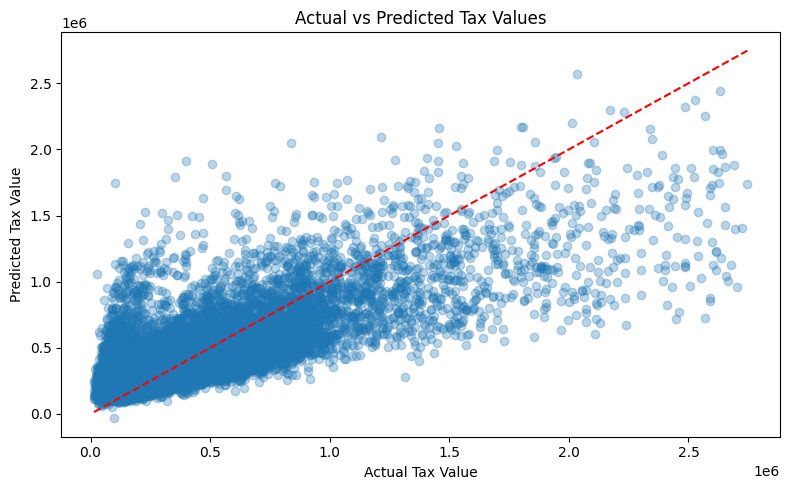

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Actual vs Predicted Tax Values")
plt.tight_layout()
plt.show()

#### 6. Conclusion [2 pts]
- Clearly state your main findings and how they address your original objectives
- Highlight the business or practical implications of your findings 
- Discuss the limitations and constraints of your analysis clearly and transparently
- Suggest potential improvements or future directions

### Conclusion

This project successfully delivered a regression model capable of predicting the tax-assessed value of residential properties using Zillow housing data. By combining thoughtful preprocessing, careful feature selection, and ensemble modeling, we built a Gradient Boosting model that achieved:

- **Train RMSE**: \$229,305  
- **Test RMSE**: \$253,586

These results demonstrate good generalization and strong predictive power, meeting the original objective of enhancing Zillow's ability to estimate missing or outdated tax values. From a business perspective, this model can help improve listing accuracy, support targeted advertising, and enhance trust in Zillow's platform among users and partners.

However, the project also had its limitations. Due to computational constraints, we limited our hyperparameter search space and feature engineering depth. The dataset also contained inherent noise and extreme outliers that can distort predictions. Moreover, we chose not to log-transform the target to preserve interpretability, which may have limited accuracy on very high-value properties.

In future work, we would explore more advanced techniques such as stacking models, deeper feature interactions, and geospatial encoding. With additional compute and time, the model could be further refined into a production-ready property valuation tool for internal or external use at Zillow.
